<a href="https://colab.research.google.com/github/rikdantas/Aprendizagem-de-Maquinas/blob/main/Lista_1/Lista1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 1 Aprendizagem de Máquinas
Esse notebook foi criado para a realização dos trabalhos da lista 1 da disciplina: DCA0133 - APRENDIZAGEM DE MÁQUINA E MINERAÇÃO DE DADOS

**Alunos: Emanoel Batista Pereira Filho e Paulo Ricardo Dantas**


## Trabalho 1
Pesquise e apresente um trabalho sobre o algoritmo Naïve-Bayes para a detecção
(classificação) de Spam em mensagens de email

- OBS: Para a realização desse trabalho foi utilizado um dataset de emails que está disponivel no link a seguir: <https://github.com/NStugard/Intro-to-Machine-Learning/blob/main/spam.csv>

In [ ]:
# Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Importando o dataset


In [ ]:
# Lendo o dataset e mostrando um preview
df = pd.read_csv('https://raw.githubusercontent.com/NStugard/Intro-to-Machine-Learning/main/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Mostrando o tamanho do dataset
print("Quantidade de colunas do dataset:", df.shape[0])

Quantidade de colunas do dataset: 5572


### Dividindo os dados em dados para treinamento e dados para teste

In [ ]:
X = df['Message']  # Recursos
Y = df['Category']    # Rótulos

# Dividindo os dados em conjunto de treinamento e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

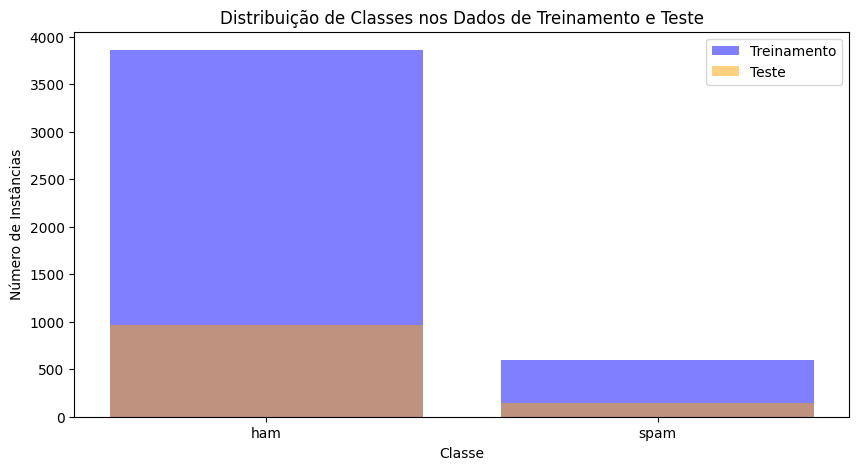

In [ ]:
# Contando o número de instâncias de cada classe nos conjuntos de treinamento e teste
train_counts = Y_treino.value_counts()
test_counts = Y_teste.value_counts()

# Criando um gráfico de barras
plt.figure(figsize=(10, 5))

# Dados de treinamento
plt.bar(train_counts.index, train_counts.values, alpha=0.5, label='Treinamento', color='blue')

# Dados de teste
plt.bar(test_counts.index, test_counts.values, alpha=0.5, label='Teste', color='orange')

plt.xlabel('Classe')
plt.ylabel('Número de Instâncias')
plt.title('Distribuição de Classes nos Dados de Treinamento e Teste')
plt.legend()
plt.show()

### Vetorização
Como foi instruído no próprio trabalho, é necessário que se faça a vetorização das mensagens, pois o algoritmo de Naive-Bayes trabalha com dados numéricos. Ou seja, vetorizar seria transformar as mensagens em números.

In [ ]:
# Vetorizando as mensagens de e-mail
vetorizador = CountVectorizer()
X_treino_vetorizado = vetorizador.fit_transform(X_treino)
X_teste_vetorizado = vetorizador.transform(X_teste)

### Criando modelo
Para criar o modelo de Naive-Bayes vai ser utilizado o método também falado na lista, o MultinomialNB().

In [ ]:
# Criando e treinando o modelo Naïve-Bayes
modelo_NB = MultinomialNB()
modelo_NB.fit(X_treino_vetorizado, Y_treino)

### Usando o modelo
Agora que o modelo está criado usando os dados de teste, precisamos fazer previsões usando o modelo e testá-las.

In [ ]:
# Fazendo previsões com o modelo treinado
previsoes = modelo_NB.predict(X_teste_vetorizado)

### Verificando eficácia do modelo
Para verificar a eficácia do modelo iremos usar duas funções já implementadas da biblioteca sklearn que é a accuracy_score e a confusion_matrix.

In [ ]:
# Avaliando a precisão do modelo
precisao = accuracy_score(Y_teste, previsoes)
print("Precisão do modelo Naïve-Bayes:", precisao)


Precisão do modelo Naïve-Bayes: 0.9919282511210762


In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(Y_teste, previsoes)
print("\nMatriz de Confusão:")
print(matriz_confusao)


Matriz de Confusão:
[[966   0]
 [  9 140]]


Note que essa matriz de confusão não é tão bem explicativa, por isso iremos plotar um gráfico para ajudar em uma melhor visualização.

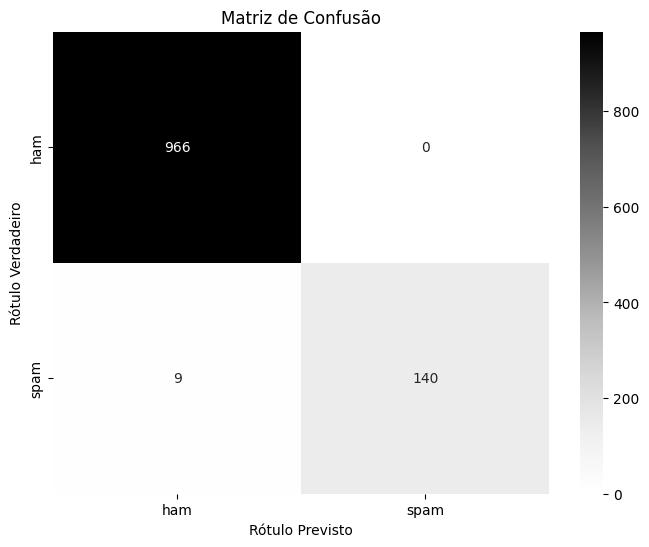

In [ ]:
# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Greys', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

## Trabalho 2:
Pesquise e apresente um trabalho sobre Random Forest para inferir o preço de uma casa (regressão) baseado em atributos como área do terreno, número de quartos, número de banheiros, etc.
- OBS: Para a realização desse trabalho foi utilizado um dataset de preços de casa que está disponivel no link a seguir: <https://www.kaggle.com/datasets/ashydv/housing-dataset>
